# HW 3

## 1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

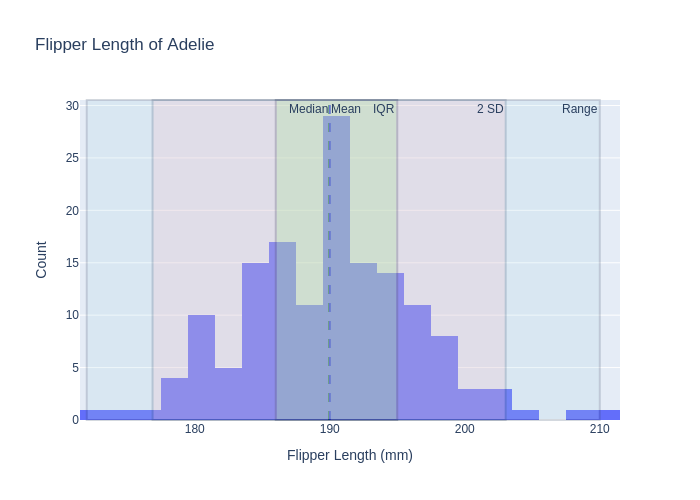

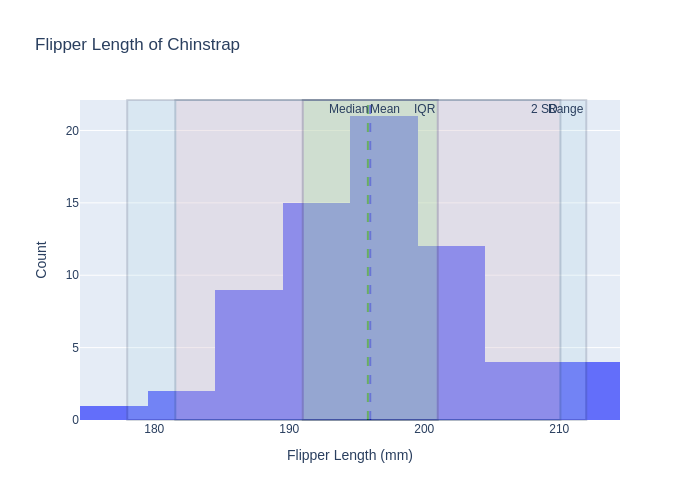

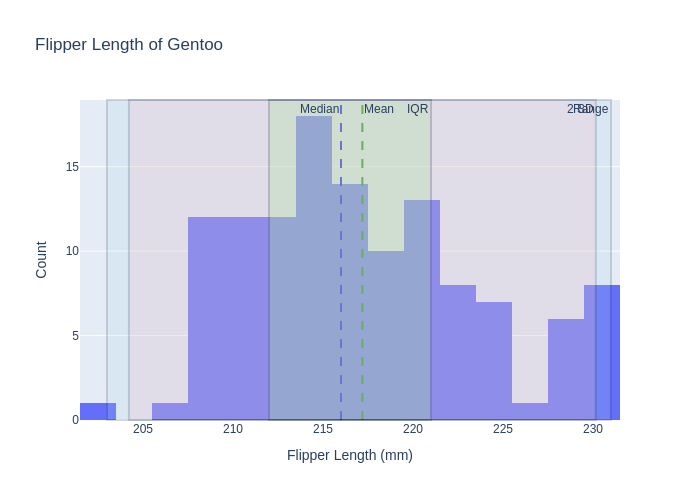

In [20]:
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset and rename it to "pingees"
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
pingees = pd.read_csv(url)

# Remove rows with missing flipper_length_mm data
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Get unique species
species = pingees['species'].unique()

# Loop through each species and create a separate histogram for each
for sp in species:
    species_data = pingees[pingees['species'] == sp]
    
    # Create a new figure for each species
    fig = go.Figure()

    # Create the histogram
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=f'{sp}', 
        opacity=1
    ))
    
    # Calculate statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    std_dev = species_data['flipper_length_mm'].std()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='green', dash='dash'), annotation_text=f'Mean', annotation_position='top right')
    fig.add_vline(x=median, line=dict(color='blue', dash='dash'), annotation_text=f'Median', annotation_position='top left')
    
    # Add shaded area for range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='lightblue', opacity=0.2, annotation_text='Range')
    
    # Add shaded area for IQR
    fig.add_vrect(x0=q1, x1=q3, fillcolor='lightgreen', opacity=0.3, annotation_text='IQR')
    
    # Add shaded area for mean ± 2 standard deviations
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, fillcolor='lightpink', opacity=0.2, annotation_text='2 SD')

    # Update layout
    fig.update_layout(
        title=f"Flipper Length of {sp}",
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        showlegend=False
    )
    
    # Show the figure for the current species
    fig.show(renderer="png")

### Summary of Interaction

In this conversation, I worked with the penguins dataset from the URL provided, using Plotly to create histograms of the flipper_length_mm column for each species of penguin. The goal was to visualize the distribution of flipper lengths by species, with added statistical markers. These included:

    Vertical lines for the mean and median of flipper lengths.
    Shaded areas representing three key statistical concepts:
        Range: the full spread of data from the minimum to the maximum value.
        Interquartile Range (IQR): the middle 50% of data, between the 1st and 3rd quartiles.
        Two Standard Deviations (2 SD): the area that encompasses approximately 95% of the data around the mean.

Separate graphs were generated for each species, providing individual insights into the distribution and variability of flipper lengths. This visualization helped highlight key patterns and central tendencies in the data for each species.

https://chatgpt.com/share/66f5fb6c-a620-8012-9f98-277ea0c59168

## 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

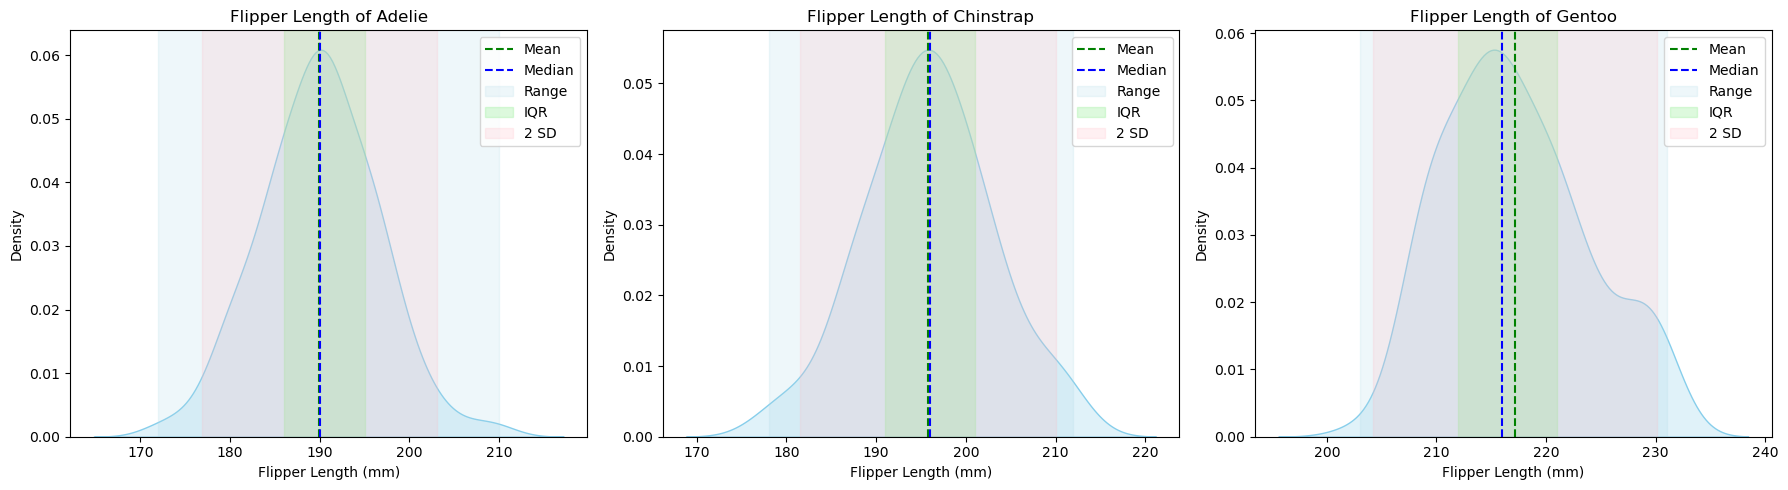

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset and rename it to "pingees"
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
pingees = pd.read_csv(url)

# Remove rows with missing flipper_length_mm data
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Get unique species
species = pingees['species'].unique()

# Set up the grid for plotting (3 plots per row)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Ensure we have enough axes to plot (in case more species are added)
axes = axes.flatten()

# Loop through each species and create a separate KDE plot for each
for i, sp in enumerate(species):
    species_data = pingees[pingees['species'] == sp]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std_dev = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Plot KDE
    sns.kdeplot(flipper_length, ax=axes[i], fill=True, color='skyblue')

    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='green', linestyle='--', label='Mean')
    axes[i].axvline(median, color='blue', linestyle='--', label='Median')
    
    # Add shaded area for range (min to max)
    axes[i].axvspan(min_val, max_val, color='lightblue', alpha=0.2, label='Range')

    # Add shaded area for IQR (Q1 to Q3)
    axes[i].axvspan(q1, q3, color='lightgreen', alpha=0.3, label='IQR')

    # Add shaded area for mean ± 2 standard deviations
    axes[i].axvspan(mean - 2*std_dev, mean + 2*std_dev, color='lightpink', alpha=0.2, label='2 SD')
    
    # Set titles and labels
    axes[i].set_title(f"Flipper Length of {sp}")
    axes[i].set_xlabel("Flipper Length (mm)")
    axes[i].set_ylabel("Density")
    
    # Display the legend
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.savefig('plot.png', format='png')


### Summary of Interaction

In this conversation, we reworked Python code to create Kernel Density Estimation (KDE) plots using Seaborn instead of histograms with Plotly. The original code used Plotly to generate histograms for different penguin species, along with statistical annotations for mean, median, range, interquartile range (IQR), and standard deviation. The revised code replaced histograms with Seaborn's kdeplot and used Matplotlib's plt.subplots to organize the KDE plots in a grid format. We also discussed the difference between Plotly and Matplotlib, specifically that plt.show() does not accept the renderer argument, which is specific to Plotly.

https://chatgpt.com/share/66f5fdeb-2030-8012-8144-759f8c9d76f3

## 3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

#### My descriptions:

1. **Box Plot** - Displays the IQR, Range, median and mean of the data set. It can also include dots to display the quantity of data points. Primarily shows the deviation of the data.
2. **Histogram** - Displays bars for each range of values, or "bin", specified on the x-axis that reach up to the count of values in that bin. The y-axis can be changed to represent something else, such as another column of values.
3. **Kernel Density Estimators (KDE)** - Essentially a smoothed out version of histogram that is not segregated into "bins" or the different bars. Istead, the KDE shows a curve that represents the count of values, or density, for the values along the x-axis.

#### ChatGPT's revision of my descriptions:

1. **Box Plot** - Displays the interquartile range (IQR), minimum, maximum (range), median, and optionally the mean of a data set. It can also include outliers shown as dots or asterisks. Primarily shows the spread and skewness of the data, emphasizing the central 50% (IQR) and highlighting any potential outliers.
2. **Histogram** - Displays bars for each range of values, or "bin," specified on the x-axis, with the height of the bars representing the frequency (count) of values within each bin. The y-axis usually represents the count or frequency but can be adjusted to show density or other values, depending on the data.
3. **Kernel Density Estimators (KDE)** - A smoothed version of a histogram that eliminates the need for discrete bins. Instead, the KDE uses a continuous probability density curve to represent the distribution of data along the x-axis, giving a clearer visual representation of the overall density or concentration of data points.

#### ChatGPT's pros and cons list:

**Box Plot**

Pros:
- Summarizes data succinctly: Shows key statistics (median, IQR, range) in one compact view.
- Identifies outliers: Easily highlights potential outliers in the data.
- Shows spread and skewness: Good for visualizing the spread and central tendency, especially useful for comparing multiple datasets side-by-side.

Cons:
- Limited detail: Does not show the distribution of individual data points, only aggregates like the quartiles.
- Does not show modality: Cannot reveal if a dataset is bimodal (has two peaks) or multimodal.
- Less intuitive: People unfamiliar with box plots may find them harder to interpret at a glance compared to more common plots like histograms.

**Histogram**

Pros:
- Displays full distribution: Shows how data is distributed across different ranges or "bins," making it great for visualizing the frequency of occurrences.
- Easy to interpret: Intuitive and widely used; easily understood by most people.
- Flexible binning: You can adjust bin width to control the level of detail in the distribution.

Cons:
- Bin selection can be arbitrary: The choice of bin size can greatly affect how the data appears, potentially distorting the insights.
- Less smooth: Histograms may look choppy or overly simplified, especially with small sample sizes.
- Comparing datasets: It's harder to overlay multiple histograms cleanly for comparison.

**Kernel Density Estimators (KDE)**

Pros:
- Smooth representation: Provides a smooth, continuous curve that makes it easier to see the shape of the distribution compared to histograms.
- No binning: Unlike histograms, KDEs don’t require binning, eliminating the need for arbitrary bin size selection.
- Better for small datasets: With small sample sizes, KDEs can provide clearer insights than histograms, which may look choppy or sparse.

Cons:
- Smoothing parameter can affect results: The bandwidth (smoothing) parameter needs to be chosen carefully, as it can over-smooth or under-smooth the data, potentially leading to inaccurate interpretations.
- Less intuitive: KDEs can be harder for some people to understand compared to histograms.
- Over-smoothing: Can obscure important features like multiple peaks (modes) if the smoothing is too aggressive.

#### My preference:

Personally, my favorite of the three ways to represent data is the KDE. I prefer this because I feel that, if created properly, a KDE is the most easily understandable graph. Without the need to read much information, the KDE displays where the majority of the data lies, which is the common purpose of the three. I prefer the KDE because displays the distribution with a simple curve, which both just looks good, and is a very clear image. 

### Summary of Interaction:

This conversation discussed three types of data visualizations: box plots, histograms, and kernel density estimators (KDEs). For each, the main features, advantages, and limitations were outlined:

    Box plots summarize key statistics like the median, interquartile range, and outliers, but lack detail on the data distribution.
    Histograms show the frequency of data points across bins, offering a clear view of distribution, though bin size selection can distort the results.
    KDEs provide a smooth representation of data density without bins, but require careful tuning and may be less intuitive than histograms.

The pros and cons of each visualization method were compared, helping to evaluate their suitability for different data analysis contexts.

https://chatgpt.com/share/66f606b9-e8d4-8012-ac69-72f2db7fadec

## 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances

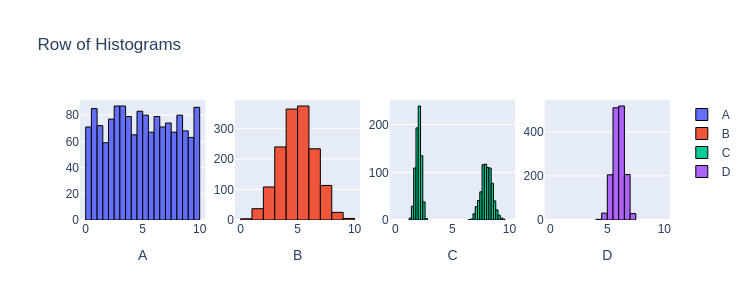

In [24]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")

**My Answers**
1. A and C
2. A and B
3. B and D
4. A and D

## 5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

In [122]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

#### My Explanation

The mean is the average of all the data and the median is the middle value of the data. With this said, the skewness of a data set depends on where the mean is relative to the median. Specifically, the data is skewed to the right if the mean is farther right than the median. In the following graph, the red bar (median) is farther right than the black bar (mean), therefore making it skew to the right:

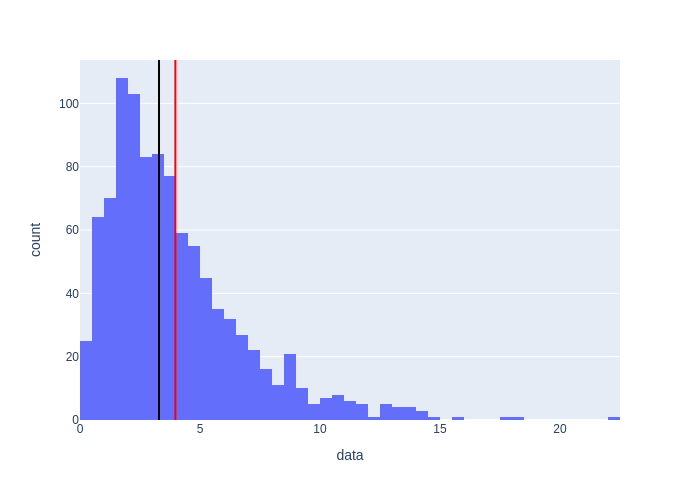

 Mean: 3.9733072009184416
 Median: 3.292079544646365


In [73]:
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats

# Generate the first sample
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Get the mean and median
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])[0]  # Get the median value

# Add mean and median lines
fig1.add_vline(x=mean_sample1, line_color='red', line_width=2)
fig1.add_vline(x=median_sample1, line_color='black', line_width=2)

# Show the histogram with mean and median lines
fig1.show(renderer="png")

# Print mean and median values
print("\033[1;30;49m Mean:", mean_sample1)
print("\033[1;31;49m Median:", median_sample1)

Oppositely, the data is skewed left if the mean is farther left than the median. In the following graph, the red bar (median) is farther left than the black bar (mean), therefore making it skew to the left:

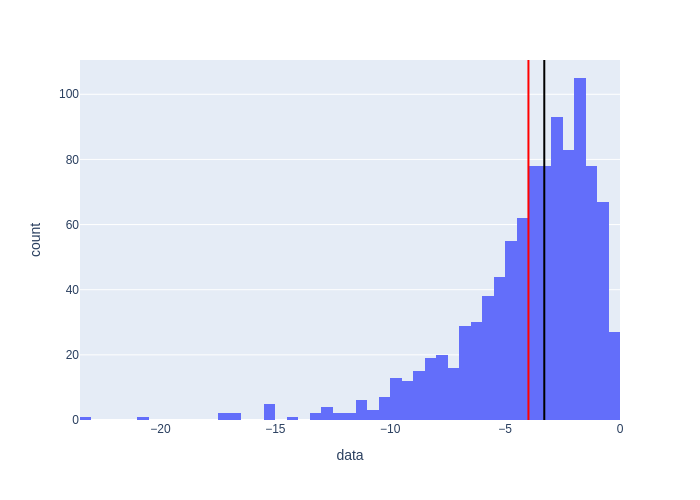

 Mean: -3.9847335705792086
 Median: -3.295165513157558


In [74]:
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats

# Generate the second sample
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

# Get the mean and median
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])[0]  # Get the median value

# Add mean and median lines
fig2.add_vline(x=mean_sample2, line_color='red', line_width=2)
fig2.add_vline(x=median_sample2, line_color='black', line_width=2)

# Show the histogram with mean and median lines
fig2.show(renderer="png")

# Print mean and median values
print("\033[1;30;49m Mean:", mean_sample2)
print("\033[1;31;49m Median:", median_sample2)

We refer to this as a "skew" because for the mean to shift to either side, there must be a large number of values on that side of the median. 

### Summary of Interaction:

In this conversation, we explored various statistical concepts and data visualization techniques using Python. We discussed the relationship between the mean, median, and skewness in distributions, specifically focusing on right-skewed and left-skewed distributions. The user provided code to generate and visualize a right-skewed gamma distribution and its negation (left-skewed) using Plotly. We then modified the code to overlay mean and median lines on the histogram without labeling them.

https://chatgpt.com/share/66f61487-23e0-8012-81b8-5340ea7fc1f0

## 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

Head of the dataset:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40  

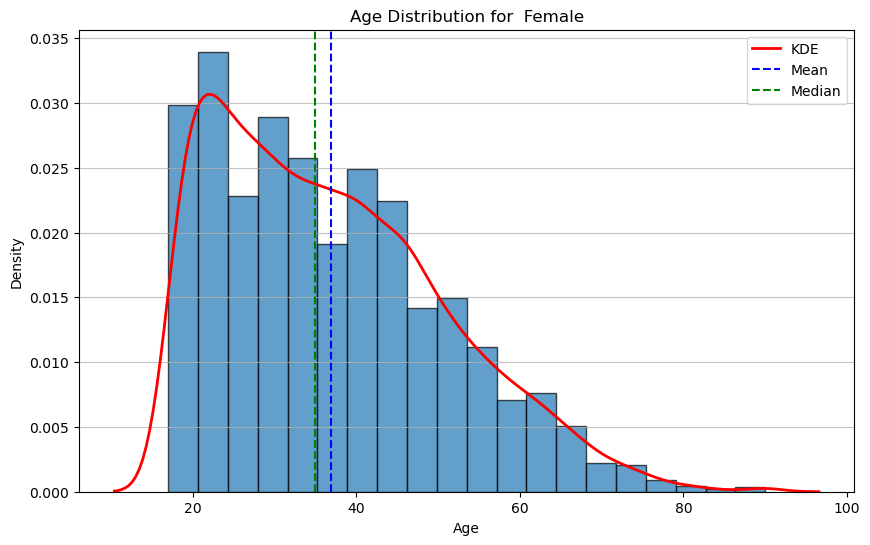

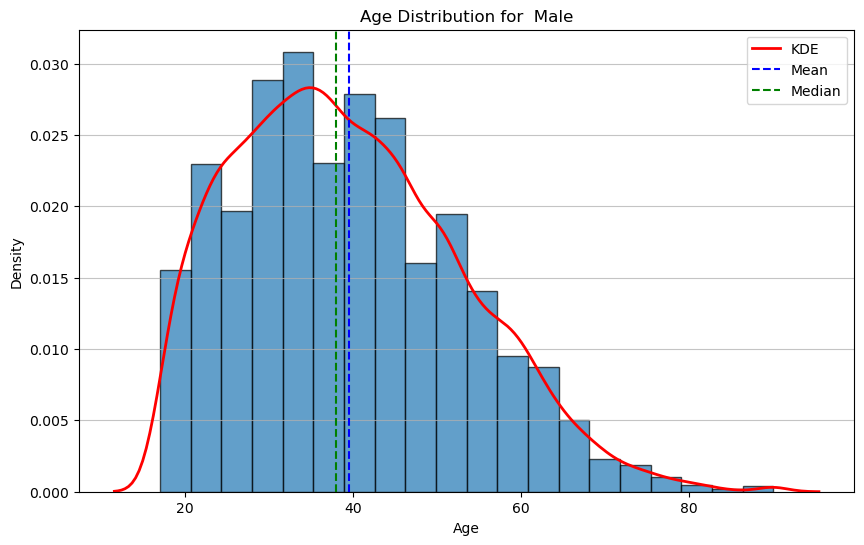

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Adult Income dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Define the column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race',
           'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv(url, header=None, names=columns)

# Print the head of the dataset
print("Head of the dataset:")
print(data.head())

# Print the data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Break the dataset into subsets by each sex
subsets = data.groupby('sex')

# Check the count of each of these new subsets
print("\nCount of each subset by sex:")
count_by_sex = subsets.size()
print(count_by_sex)

# Create a histogram for each subset
for sex, subset in subsets:
    plt.figure(figsize=(10, 6))
    
    # Histogram
    plt.hist(subset['age'], bins=20, edgecolor='black', alpha=0.7, density=True)

    # KDE Curve
    sns.kdeplot(subset['age'], color='red', lw=2, label='KDE')

    # Calculate and plot mean and median
    mean_age = subset['age'].mean()
    median_age = subset['age'].median()
    plt.axvline(mean_age, color='blue', linestyle='dashed', linewidth=1.5, label='Mean')
    plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1.5, label='Median')

    plt.title(f'Age Distribution for {sex}')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    
    # Use FigureCanvas to save as PNG
    canvas = FigureCanvas(fig)
    canvas.draw()  # Render the figure
    fig.savefig(f'age_distribution_{sex.lower()}.png', bbox_inches='tight', format='png')


### Summary of Interaction

In this interaction, you asked for Python code to analyze the Adult Income dataset. The code was provided to accomplish several tasks: print the dataset's head, check data types, create subsets by sex, count each subset, and generate histograms showing age distribution for each sex.

https://chatgpt.com/share/66f626c6-d164-8012-91cb-5803302d3e71

You provided a code snippet for analyzing the Adult Income dataset and requested modifications to include bars for the median and mean, as well as a kernel density estimator (KDE) curve in the histograms. I updated the code accordingly and explained the changes made.

https://chatgpt.com/share/66f620d9-a950-8012-9c16-f6ff4323cd24

## 7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

In [110]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90])

fig.update_layout(template="plotly_dark")

fig.show()

## 8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

In [121]:
import plotly.express as px
import pandas as pd

# Load the gapminder dataset
df = px.data.gapminder()

# Calculate 'percent change' and 'rank'
df['percent change'] = df.groupby('country')['lifeExp'].pct_change()  # Calculate percent change in life expectancy
df['rank'] = df.groupby('year')['lifeExp'].rank(method='min', ascending=False)  # Rank based on life expectancy
df['percent'] = df['pop'] / df['pop'].sum()  # Calculate percentage of population relative to total

# Create the second scatter plot with modified parameters
fig2 = px.scatter(df, 
                  x="percent change", 
                  y="rank", 
                  animation_frame="year", 
                  animation_group="country",  # Use country for animation group
                  size="percent", 
                  color="continent",  # Change to continent for coloring
                  hover_name="country",  # Use country for hover name
                  size_max=50, 
                  range_x=[-0.005, 0.005])

fig2.update_layout(template="plotly_dark")

fig2.show()

### Summary of Interaction:

In this conversation, I asked for help modifying a Plotly Express scatter plot using the Gapminder dataset. Initially, I provided a code snippet for plotting GDP per capita against life expectancy. After requesting changes to the axes, size, color, and animation, I encountered errors due to nonexistent columns. I asked for clarification on these issues, and you suggested calculating the missing columns. When I faced another error related to the color parameter, I inquired about alternatives. You guided me to use the existing continent column instead. Ultimately, I received a working version of the scatter plot with the desired modifications.

https://chatgpt.com/share/66f62612-1c1c-8012-9158-6c6c353e38f4

## 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes